# Integration
This are the initial tests towards integration. One of the main analysis the time consume to run the codes 

In [89]:
from dtwinpylib.dtwinpy.Digital_Twin import Digital_Twin
from dtwinpylib.dtwinpy.interfaceDB import Database
import sqlite3

import importlib
import dtwinpylib
importlib.reload(dtwinpylib.dtwinpy.Digital_Twin) 
importlib.reload(dtwinpylib.dtwinpy.interfaceDB) 

<module 'dtwinpylib.dtwinpy.interfaceDB' from 'c:\\Users\\pedro\\Github Repositories\\Digital_Twin\\Digital Twin\\dtwinpylib\\dtwinpy\\interfaceDB.py'>

## When to Synchronize?

The problem with Sync is that we need to update the timestamp from real log to match (with a certain error) the timestamp with the digital log. Ideally the digital log starts with timestamp 0, but just in the case that some event happen rigth in the beginning of the simulation. Thus, in the case of a simulation where all the machines are busy or the free machines doesn't have any part in the queue, the digital log is just going to be update after the first busy machine finish a part, so where is the time zero for the real log in that case? 

So would be ideal to just synchronize with a trace 'Started'. Thus, for that we need to have a certain frequency to Synch, but also the initial trace need to be 'Started', so the final frequency could be a little be early or a little bit late, depending on each event 'Started' is more close to the ideal time.

Let's take this example of real log:
dT = 1/f
Tsync = To + dT

f = (1/10)
dT = 10
To = 0
Tsync = 10

Ideally, the cut in the database to Synchronize the systems would be Tsync = 10. But this is a finished trace, so we look for the most close 'started' trace. In this case, a little bit in the past in T= 00

(00, m3, s)
(10, m1, f)
(20, m2, s)
(20, m1, s)
...



==========  Reading the Model: 5s_determ  ==========
===> Big Picture
Total number of Machines: 5
Total number of Queues: 5

===>Detailed view of Queues:
----------------
Queue 1
Arc links: [5, 1]
Capacity: 10
|-- Parts stored: Part 1
|-- Parts stored: Part 2
|-- Parts stored: Part 3
|-- Parts stored: Part 4
|-- Parts stored: Part 5
Queue Lenght: 5
----------------
Queue 2
Arc links: [1, 2]
Capacity: 10
Queue Lenght: 0
----------------
Queue 3
Arc links: [1, 3]
Capacity: 10
Queue Lenght: 0
----------------
Queue 4
Arc links: None
Capacity: 20
Queue Lenght: 0
----------------
Queue 5
Arc links: [4, 5]
Capacity: 10
Queue Lenght: 0

===>Detailed view of Machines:
----------------
> Machine 1
--Queue In:--
Queue 1
--Queue Out:--
Queue 2
Queue 3
Machine Cluster: 1
Branching Machine: Branch 1 | Machine 1
|-- Conveyor towards Queue 2
|-- Conveyor towards Queue 3
----------------
> Machine 2
--Queue In:--
Queue 2
--Queue Out:--
Queue 4
Machine Cluster: 2
----------------
> Machine 3
--Queue In

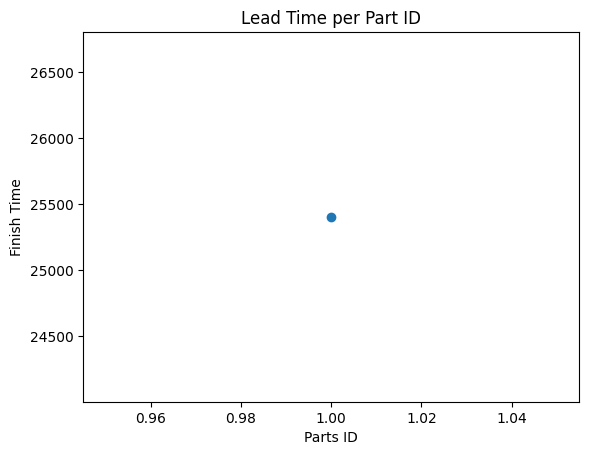

- Maximum Cycle Time: 25403
- Minimum Cycle Time: 25403
>>> Average system cycle time: 25403.0 [time unit]***


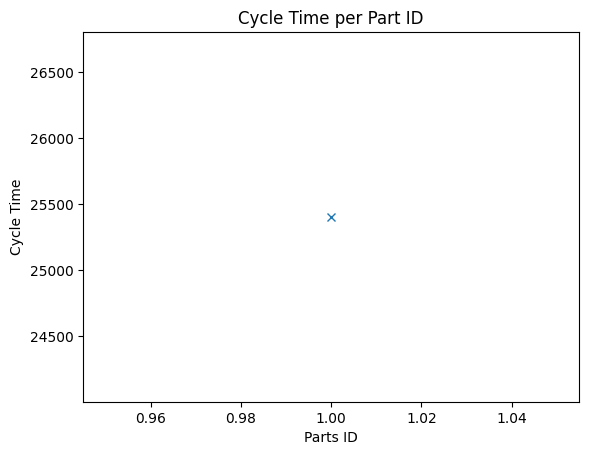

>>> System Throughput: 3.93654292800063e-05 [parts / time unit] 
==========  Reading the Model: 5s_determ  ==========
===> Big Picture
Total number of Machines: 5
Total number of Queues: 5

===>Detailed view of Queues:
----------------
Queue 1
Arc links: [5, 1]
Capacity: 10
|-- Parts stored: Part 1
|-- Parts stored: Part 2
|-- Parts stored: Part 3
|-- Parts stored: Part 4
|-- Parts stored: Part 5
Queue Lenght: 5
----------------
Queue 2
Arc links: [1, 2]
Capacity: 10
Queue Lenght: 0
----------------
Queue 3
Arc links: [1, 3]
Capacity: 10
Queue Lenght: 0
----------------
Queue 4
Arc links: None
Capacity: 20
Queue Lenght: 0
----------------
Queue 5
Arc links: [4, 5]
Capacity: 10
Queue Lenght: 0

===>Detailed view of Machines:
----------------
> Machine 1
--Queue In:--
Queue 1
--Queue Out:--
Queue 2
Queue 3
Machine Cluster: 1
Branching Machine: Branch 1 | Machine 1
|-- Conveyor towards Queue 2
|-- Conveyor towards Queue 3
----------------
> Machine 2
--Queue In:--
Queue 2
--Queue Out:--
Q

<span style='color:yellow'>[WARNING][validator.py/get_part_TDS()] Trying to get the trace of Part 4, but no traces was created for that part</span>

If you're running a short simulation, it's possible that the part was in the simulation, but didn't had time to appear in the trace, otherwise CHECK IT OUT


<span style='color:yellow'>[WARNING][validator.py/get_part_TDS()] Trying to get the trace of Part 5, but no traces was created for that part</span>

If you're running a short simulation, it's possible that the part was in the simulation, but didn't had time to appear in the trace, otherwise CHECK IT OUT
-----------------------------------------------------------------------------------------
=== matrix_ptime_qTDS ===
[VALIDATOR] Simulation Deterministic - No correlation of randoness needed

=== matrix_ptime_TDS ===
Part 1: [10000, 10000, 3000, 2000]
Part 2: [10000]
Part 3: []
-----------------------------------------------------------------------------------------
============ Running Trace Driven Simulation ============
### ============ Simulation Started ============ ###
Time: 0 - [Machine 1] got Part 1 from Queue 1 (capacity= 4)
Time: 10000 - [Conveyor towards Queue 2] GOT Part 1
Time: 10000 - [Machine 1] got Part 2 from Queue 1 (capacity= 3)
Time: 10200 - [Conveyor towards Queue 2] PUT Part 1 in the Queue 2
Time: 10201 - [Machine 2] got Part 1 from Queue 2 (capacity= 0)
Time: 20000 - [Conveyor towards Queue 3] GOT Part 2
Time: 

<Figure size 640x480 with 0 Axes>

In [86]:
#--- Create a Digital Twin object
mydt = Digital_Twin(name= "5s_determ")
mydt.run_digital_model(plot= True, verbose= True, targeted_part_id= 1, targeted_cluster= 4)
mydt.run_sync(copied_realDB=True)


==========  Reading the Model: 5s_determ  ==========
===> Big Picture
Total number of Machines: 5
Total number of Queues: 5

===>Detailed view of Queues:
----------------
Queue 1
Arc links: [5, 1]
Capacity: 10
|-- Parts stored: Part 1
|-- Parts stored: Part 2
|-- Parts stored: Part 3
|-- Parts stored: Part 4
|-- Parts stored: Part 5
Queue Lenght: 5
----------------
Queue 2
Arc links: [1, 2]
Capacity: 10
Queue Lenght: 0
----------------
Queue 3
Arc links: [1, 3]
Capacity: 10
Queue Lenght: 0
----------------
Queue 4
Arc links: None
Capacity: 20
Queue Lenght: 0
----------------
Queue 5
Arc links: [4, 5]
Capacity: 10
Queue Lenght: 0

===>Detailed view of Machines:
----------------
> Machine 1
--Queue In:--
Queue 1
--Queue Out:--
Queue 2
Queue 3
Machine Cluster: 1
Branching Machine: Branch 1 | Machine 1
|-- Conveyor towards Queue 2
|-- Conveyor towards Queue 3
----------------
> Machine 2
--Queue In:--
Queue 2
--Queue Out:--
Queue 4
Machine Cluster: 2
----------------
> Machine 3
--Queue In

<span style='color:yellow'>[WARNING][digital_model.py / analyze_result()] No parts finished in the simulation</span>

==========  Reading the Model: 5s_determ  ==========
===> Big Picture
Total number of Machines: 5
Total number of Queues: 5

===>Detailed view of Queues:
----------------
Queue 1
Arc links: [5, 1]
Capacity: 10
|-- Parts stored: Part 1
|-- Parts stored: Part 2
|-- Parts stored: Part 3
|-- Parts stored: Part 4
|-- Parts stored: Part 5
Queue Lenght: 5
----------------
Queue 2
Arc links: [1, 2]
Capacity: 10
Queue Lenght: 0
----------------
Queue 3
Arc links: [1, 3]
Capacity: 10
Queue Lenght: 0
----------------
Queue 4
Arc links: None
Capacity: 20
Queue Lenght: 0
----------------
Queue 5
Arc links: [4, 5]
Capacity: 10
Queue Lenght: 0

===>Detailed view of Machines:
----------------
> Machine 1
--Queue In:--
Queue 1
--Queue Out:--
Queue 2
Queue 3
Machine Cluster: 1
Branching Machine: Branch 1 | Machine 1
|-- Conveyor towards Queue 2
|-- Conveyor towards Queue 3
----------------
> Machine 2
--Queue In:--
Queue 2
--Queue Out:--
Queue 4
Machine Cluster: 2
----------------
> Machine 3
--Queue In

<span style='color:yellow'>[WARNING][validator.py/get_part_TDS()] Trying to get the trace of Part 3, but no traces was created for that part</span>

If you're running a short simulation, it's possible that the part was in the simulation, but didn't had time to appear in the trace, otherwise CHECK IT OUT


<span style='color:yellow'>[WARNING][validator.py/get_part_TDS()] Trying to get the trace of Part 4, but no traces was created for that part</span>

If you're running a short simulation, it's possible that the part was in the simulation, but didn't had time to appear in the trace, otherwise CHECK IT OUT


<span style='color:yellow'>[WARNING][validator.py/get_part_TDS()] Trying to get the trace of Part 5, but no traces was created for that part</span>

If you're running a short simulation, it's possible that the part was in the simulation, but didn't had time to appear in the trace, otherwise CHECK IT OUT
-----------------------------------------------------------------------------------------
=== matrix_ptime_qTDS ===
[VALIDATOR] Simulation Deterministic - No correlation of randoness needed

=== matrix_ptime_TDS ===
Part 1: [10000]
Part 2: []
-----------------------------------------------------------------------------------------
============ Running Trace Driven Simulation ============
### ============ Simulation Started ============ ###
Time: 0 - [Machine 1] got Part 1 from Queue 1 (capacity= 4)
Time: 10000 - [Conveyor towards Queue 2] GOT Part 1
Time: 10000 - [Machine 1] got Part 2 from Queue 1 (capacity= 3)
=== Reading all the events from table: digital_log ===
(1, 0, 'Machine 1', 'Started', 'Part 1', 'Queue 1', None, None)
(2, 10000, 'Machine 1', 'Finished', 'Part 1', 'Queue 2', None, None)
(3, 10000, 'Machine 1', 'Started', '

<span style='color:yellow'>[WARNING][digital_model.py / analyze_result()] No parts finished in the simulation</span>

==========  Reading the Model: 5s_determ  ==========
===> Big Picture
Total number of Machines: 5
Total number of Queues: 5

===>Detailed view of Queues:
----------------
Queue 1
Arc links: [5, 1]
Capacity: 10
|-- Parts stored: Part 3
|-- Parts stored: Part 4
|-- Parts stored: Part 5
Queue Lenght: 3
----------------
Queue 2
Arc links: [1, 2]
Capacity: 10
|-- Parts stored: Part 1
Queue Lenght: 1
----------------
Queue 3
Arc links: [1, 3]
Capacity: 10
Queue Lenght: 0
----------------
Queue 4
Arc links: None
Capacity: 20
Queue Lenght: 0
----------------
Queue 5
Arc links: [4, 5]
Capacity: 10
Queue Lenght: 0

===>Detailed view of Machines:
----------------
> Machine 1
--Queue In:--
Queue 1
--Queue Out:--
Queue 2
Queue 3
Machine Cluster: 1
Branching Machine: Branch 1 | Machine 1
|-- Conveyor towards Queue 2
|-- Conveyor towards Queue 3
--- Part already being processed: Part 2 ---
----------------
> Machine 2
--Queue In:--
Queue 2
--Queue Out:--
Queue 4
Machine Cluster: 2
----------------
> 

<span style='color:yellow'>[WARNING][validator.py/get_part_TDS()] Trying to get the trace of Part 4, but no traces was created for that part</span>

If you're running a short simulation, it's possible that the part was in the simulation, but didn't had time to appear in the trace, otherwise CHECK IT OUT


<span style='color:yellow'>[WARNING][validator.py/get_part_TDS()] Trying to get the trace of Part 5, but no traces was created for that part</span>

If you're running a short simulation, it's possible that the part was in the simulation, but didn't had time to appear in the trace, otherwise CHECK IT OUT
-----------------------------------------------------------------------------------------
=== matrix_ptime_qTDS ===
[VALIDATOR] Simulation Deterministic - No correlation of randoness needed

=== matrix_ptime_TDS ===
Part 1: [10000]
Part 2: [9990]
Part 3: []
-----------------------------------------------------------------------------------------
============ Running Trace Driven Simulation ============
### ============ Simulation Started ============ ###
Time: 0 - [Machine 2] got Part 1 from Queue 2 (capacity= 0)
Time: 9990 - [Conveyor towards Queue 3] GOT Part 2
Time: 9990 - [Machine 1] got Part 3 from Queue 1 (capacity= 2)
Time: 10000 - [Conveyor towards Queue 4] GOT Part 1
=== Reading all the events from table: digital_log ===
(1, 0, 'Machine 2', 'Started', 'Part 1', 'Queue 2', None, None)
(2, 9990, 'Machine 1', 'Finished', 'Part

<span style='color:yellow'>[WARNING][digital_model.py / analyze_result()] No parts finished in the simulation</span>

==========  Reading the Model: 5s_determ  ==========
===> Big Picture
Total number of Machines: 5
Total number of Queues: 5

===>Detailed view of Queues:
----------------
Queue 1
Arc links: [5, 1]
Capacity: 10
|-- Parts stored: Part 4
|-- Parts stored: Part 5
Queue Lenght: 2
----------------
Queue 2
Arc links: [1, 2]
Capacity: 10
Queue Lenght: 0
----------------
Queue 3
Arc links: [1, 3]
Capacity: 10
|-- Parts stored: Part 2
Queue Lenght: 1
----------------
Queue 4
Arc links: None
Capacity: 20
|-- Parts stored: Part 1
Queue Lenght: 1
----------------
Queue 5
Arc links: [4, 5]
Capacity: 10
Queue Lenght: 0

===>Detailed view of Machines:
----------------
> Machine 1
--Queue In:--
Queue 1
--Queue Out:--
Queue 2
Queue 3
Machine Cluster: 1
Branching Machine: Branch 1 | Machine 1
|-- Conveyor towards Queue 2
|-- Conveyor towards Queue 3
--- Part already being processed: Part 3 ---
----------------
> Machine 2
--Queue In:--
Queue 2
--Queue Out:--
Queue 4
Machine Cluster: 2
----------------
> 

<span style='color:yellow'>[WARNING][validator.py/get_part_TDS()] Trying to get the trace of Part 4, but no traces was created for that part</span>

If you're running a short simulation, it's possible that the part was in the simulation, but didn't had time to appear in the trace, otherwise CHECK IT OUT


<span style='color:yellow'>[WARNING][validator.py/get_part_TDS()] Trying to get the trace of Part 5, but no traces was created for that part</span>

If you're running a short simulation, it's possible that the part was in the simulation, but didn't had time to appear in the trace, otherwise CHECK IT OUT


<span style='color:yellow'>[WARNING][validator.py/get_part_TDS()] Trying to get the trace of Part 3, but no traces was created for that part</span>

If you're running a short simulation, it's possible that the part was in the simulation, but didn't had time to appear in the trace, otherwise CHECK IT OUT
-----------------------------------------------------------------------------------------
=== matrix_ptime_qTDS ===
[VALIDATOR] Simulation Deterministic - No correlation of randoness needed

=== matrix_ptime_TDS ===
Part 1: [3000]
Part 2: []
-----------------------------------------------------------------------------------------
============ Running Trace Driven Simulation ============
### ============ Simulation Started ============ ###
Time: 0 - [Machine 3] got Part 2 from Queue 3 (capacity= 0)
Time: 0 - [Machine 4] got Part 1 from Queue 4 (capacity= 0)
Time: 3000 - [Conveyor towards Queue 5] GOT Part 1
=== Reading all the events from table: digital_log ===
(1, 0, 'Machine 3', 'Started', 'Part 2', 'Queue 3', None, None)
(2, 0, 'Machine 4', 'Started', 'Part 1', 'Queue 4', None, None)
(3, 3000, 'Machine 4', 'Finished', 'Part 1', 'Q

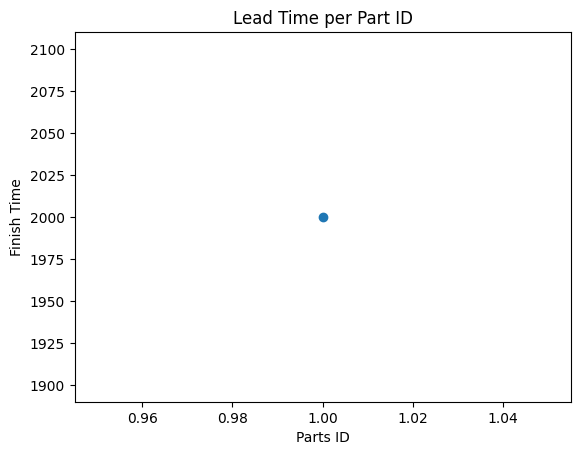

- Maximum Cycle Time: 2000
- Minimum Cycle Time: 2000
>>> Average system cycle time: 2000.0 [time unit]***


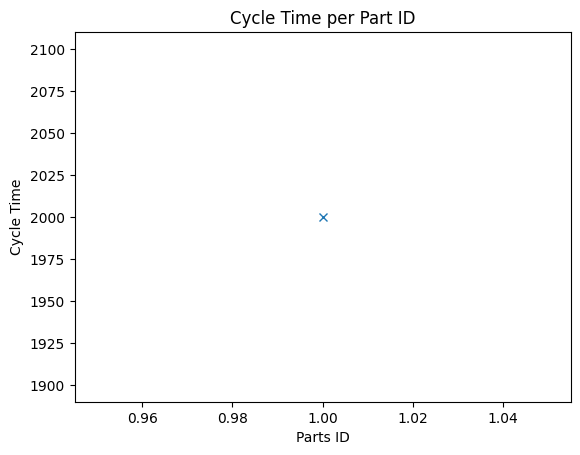

>>> System Throughput: 0.0005 [parts / time unit] 
==========  Reading the Model: 5s_determ  ==========
===> Big Picture
Total number of Machines: 5
Total number of Queues: 5

===>Detailed view of Queues:
----------------
Queue 1
Arc links: [5, 1]
Capacity: 10
|-- Parts stored: Part 4
|-- Parts stored: Part 5
Queue Lenght: 2
----------------
Queue 2
Arc links: [1, 2]
Capacity: 10
Queue Lenght: 0
----------------
Queue 3
Arc links: [1, 3]
Capacity: 10
Queue Lenght: 0
----------------
Queue 4
Arc links: None
Capacity: 20
Queue Lenght: 0
----------------
Queue 5
Arc links: [4, 5]
Capacity: 10
|-- Parts stored: Part 1
Queue Lenght: 1

===>Detailed view of Machines:
----------------
> Machine 1
--Queue In:--
Queue 1
--Queue Out:--
Queue 2
Queue 3
Machine Cluster: 1
Branching Machine: Branch 1 | Machine 1
|-- Conveyor towards Queue 2
|-- Conveyor towards Queue 3
--- Part already being processed: Part 3 ---
----------------
> Machine 2
--Queue In:--
Queue 2
--Queue Out:--
Queue 4
Machine Clus

<span style='color:yellow'>[WARNING][validator.py/get_part_TDS()] Trying to get the trace of Part 4, but no traces was created for that part</span>

If you're running a short simulation, it's possible that the part was in the simulation, but didn't had time to appear in the trace, otherwise CHECK IT OUT


<span style='color:yellow'>[WARNING][validator.py/get_part_TDS()] Trying to get the trace of Part 5, but no traces was created for that part</span>

If you're running a short simulation, it's possible that the part was in the simulation, but didn't had time to appear in the trace, otherwise CHECK IT OUT


<span style='color:yellow'>[WARNING][validator.py/get_part_TDS()] Trying to get the trace of Part 3, but no traces was created for that part</span>

If you're running a short simulation, it's possible that the part was in the simulation, but didn't had time to appear in the trace, otherwise CHECK IT OUT


<span style='color:yellow'>[WARNING][validator.py/get_part_TDS()] Trying to get the trace of Part 2, but no traces was created for that part</span>

If you're running a short simulation, it's possible that the part was in the simulation, but didn't had time to appear in the trace, otherwise CHECK IT OUT
-----------------------------------------------------------------------------------------
=== matrix_ptime_qTDS ===
[VALIDATOR] Simulation Deterministic - No correlation of randoness needed

=== matrix_ptime_TDS ===
Part 1: [2000]
-----------------------------------------------------------------------------------------
============ Running Trace Driven Simulation ============
### ============ Simulation Started ============ ###
Time: 0 - [Machine 5] got Part 1 from Queue 5 (capacity= 0)
Time: 2000 - [Terminator] xxx Part 1 terminated xxx
Time: 2000 - [Terminator] Part 6 replaced
Time: 2000 - [Conveyor towards Queue 1] GOT Part 6
=== Reading all the events from table: digital_log ===
(1, 0, 'Machine 5', 'Started', 'Part 1', 'Queue 5', None, None)
(2, 2000, 'Machine 5', 'Finished', 'Part 1', 'Queue 1', None, None)
### ============ Sim

<Figure size 640x480 with 0 Axes>

In [85]:
#--- Create a Digital Twin object
mydt = Digital_Twin(name= "5s_determ")

#--- Maximum number of cluster in the model
total_cluster = 4

#--- Starting from this cluster
current_cluster = 1

#--- Loop from the starting cluster until the last cluster
while current_cluster <= total_cluster:
    #--- Run the digital model to populate the digital database
    mydt.run_digital_model(plot= True, verbose= True, targeted_part_id= 1, targeted_cluster= current_cluster)

    #--- Caculate the RCT
    print(mydt.digital_model.calculate_RCT())
    
    #--- Run Synchronization to update the model according to the last state of the previous simulation
    # Note: copied_realDB=True because we're using the digital database as the real database
    mydt.run_sync(copied_realDB=True)

    #--- Increase the current cluster for the next simulation
    current_cluster += 1


==========  Reading the Model: 5s_determ  ==========
===> Big Picture
Total number of Machines: 5
Total number of Queues: 5

===>Detailed view of Queues:
----------------
Queue 1
Arc links: [5, 1]
Capacity: 10
|-- Parts stored: Part 5
|-- Parts stored: Part 6
Queue Lenght: 2
----------------
Queue 2
Arc links: [1, 2]
Capacity: 10
|-- Parts stored: Part 3
Queue Lenght: 1
----------------
Queue 3
Arc links: [1, 3]
Capacity: 10
Queue Lenght: 0
----------------
Queue 4
Arc links: None
Capacity: 20
Queue Lenght: 0
----------------
Queue 5
Arc links: [4, 5]
Capacity: 10
Queue Lenght: 0

===>Detailed view of Machines:
----------------
> Machine 1
--Queue In:--
Queue 1
--Queue Out:--
Queue 2
Queue 3
Machine Cluster: 1
Branching Machine: Branch 1 | Machine 1
|-- Conveyor towards Queue 2
|-- Conveyor towards Queue 3
--- Part already being processed: Part 4 ---
----------------
> Machine 2
--Queue In:--
Queue 2
--Queue Out:--
Queue 4
Machine Cluster: 2
----------------
> Machine 3
--Queue In:--
Q

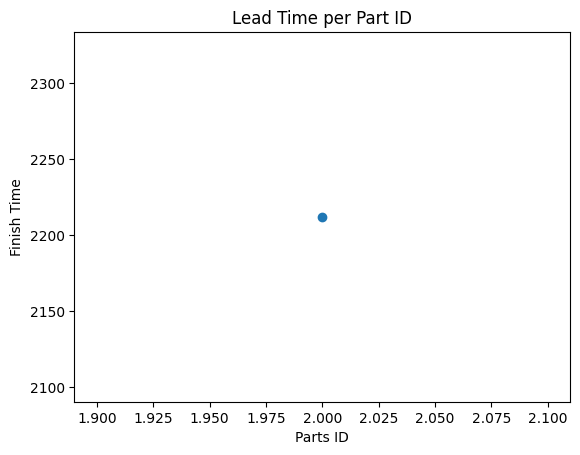

- Maximum Cycle Time: 2212
- Minimum Cycle Time: 2212
>>> Average system cycle time: 2212.0 [time unit]***


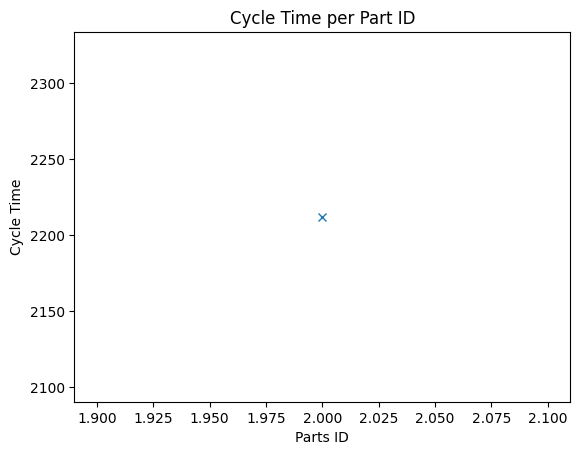

>>> System Throughput: 0.0004520795660036166 [parts / time unit] 
==========  Reading the Model: 5s_determ  ==========
===> Big Picture
Total number of Machines: 5
Total number of Queues: 5

===>Detailed view of Queues:
----------------
Queue 1
Arc links: [5, 1]
Capacity: 10
|-- Parts stored: Part 5
|-- Parts stored: Part 6
Queue Lenght: 2
----------------
Queue 2
Arc links: [1, 2]
Capacity: 10
|-- Parts stored: Part 3
Queue Lenght: 1
----------------
Queue 3
Arc links: [1, 3]
Capacity: 10
Queue Lenght: 0
----------------
Queue 4
Arc links: None
Capacity: 20
Queue Lenght: 0
----------------
Queue 5
Arc links: [4, 5]
Capacity: 10
Queue Lenght: 0

===>Detailed view of Machines:
----------------
> Machine 1
--Queue In:--
Queue 1
--Queue Out:--
Queue 2
Queue 3
Machine Cluster: 1
Branching Machine: Branch 1 | Machine 1
|-- Conveyor towards Queue 2
|-- Conveyor towards Queue 3
--- Part already being processed: Part 4 ---
----------------
> Machine 2
--Queue In:--
Queue 2
--Queue Out:--
Queue

<span style='color:yellow'>[WARNING][validator.py/get_part_TDS()] Trying to get the trace of Part 6, but no traces was created for that part</span>

If you're running a short simulation, it's possible that the part was in the simulation, but didn't had time to appear in the trace, otherwise CHECK IT OUT
-----------------------------------------------------------------------------------------
=== matrix_ptime_qTDS ===
[VALIDATOR] Simulation Deterministic - No correlation of randoness needed

=== matrix_ptime_TDS ===
Part 2: [111, 2000]
Part 3: []
Part 4: [9990]
Part 5: []
-----------------------------------------------------------------------------------------
============ Running Trace Driven Simulation ============
### ============ Simulation Started ============ ###
Time: 0 - [Machine 2] got Part 3 from Queue 2 (capacity= 0)
Time: 111 - [Conveyor towards Queue 5] GOT Part 2
Time: 211 - [Conveyor towards Queue 5] PUT Part 2 in the Queue 5
Time: 212 - [Machine 5] got Part 2 from Queue 5 (capacity= 0)
Time: 2212 - [Terminator] xxx Part 2 terminated xxx
Time: 2212 - [Terminator] Part 7 replaced
Time: 2212 - [Conveyor towards Queue 1]

<Figure size 640x480 with 0 Axes>

In [84]:
mydt = Digital_Twin(name= "5s_determ")
mydt.run_digital_model(plot= True, verbose= True, targeted_part_id= 4, targeted_cluster= 1)
mydt.run_sync(copied_realDB=True)

In [11]:
database_path = "databases/5s_determ/digital_database.db"
testdb = Database(database_path= database_path, event_table= "digital_log")
testdb.read_part_path(partid= "Part 10", table= "digital_log")


[(39, 32000, 'Machine 1', 'Started', 'Part 10', 'Queue 1', None, None),
 (43, 36000, 'Machine 1', 'Finished', 'Part 10', 'Queue 2', None, None),
 (44, 36000, 'Machine 1', 'Started', 'Part 10', 'Queue 1', None, None),
 (50, 40000, 'Machine 1', 'Finished', 'Part 10', 'Queue 3', None, None),
 (52, 40201, 'Machine 3', 'Started', 'Part 10', 'Queue 3', None, None),
 (61, 47201, 'Machine 3', 'Finished', 'Part 10', 'Queue 4', None, None),
 (62, 47302, 'Machine 4', 'Started', 'Part 10', 'Queue 4', None, None),
 (67, 50302, 'Machine 4', 'Finished', 'Part 10', 'Queue 5', None, None),
 (68, 50403, 'Machine 5', 'Started', 'Part 10', 'Queue 5', None, None),
 (71, 52403, 'Machine 5', 'Finished', 'Part 10', 'Queue 1', None, None),
 (135, 100000, 'Machine 2', 'Started', 'Part 10', 'Queue 2', None, None),
 (153, 120000, 'Machine 2', 'Finished', 'Part 10', 'Queue 4', None, None),
 (155, 120101, 'Machine 4', 'Started', 'Part 10', 'Queue 4', None, None),
 (158, 123101, 'Machine 4', 'Finished', 'Part 10', '

In [8]:
with sqlite3.connect(database_path) as db:
    db.execute("UPDATE real_log SET timestamp_real = timestamp;")

In [9]:
testdb.read_all_events("real_log")

=== Reading all the events from table: real_log ===
(15, 39805, 'Machine 4', 'Finished', 'Part 4', 'Queue 5', None, 39805)
(16, 39906, 'Machine 5', 'Started', 'Part 4', 'Queue 5', None, 39906)
(17, 40000, 'Machine 2', 'Finished', 'Part 3', 'Queue 4', None, 40000)


In [10]:
testdb.get_distinct_values('machine_id', 'real_log')

[('Machine 4',), ('Machine 5',), ('Machine 2',)]

In [89]:
from IPython.display import Markdown, display

# Define the Markdown strings for different colors
RED = "<span style='color:red'>"
GREEN = "<span style='color:green'>"
YELLOW = "<span style='color:yellow'>"
BLUE = "<span style='color:blue'>"
RESET = "</span>"

# Define a function to display colored text
def display_color(text, color):
    display(Markdown(f"{color}{text}{RESET}"))

# Print a string with different colors
var = 12
display_color("##This text is red", RED)
display_color("This text is green", GREEN)
display_color("This text is yellow", YELLOW)
display_color("This text is blue", BLUE)

def printer(markdown):
    display(Markdown(f"{markdown}{RESET}"))

printer("- oi")


<span style='color:red'>##This text is red</span>

<span style='color:green'>This text is green</span>

<span style='color:yellow'>This text is yellow</span>

<span style='color:blue'>This text is blue</span>

<span style='color:yellow'> 12</span>

In [10]:
from dtwinpylib.dtwinpy.helper import Helper
help = Helper()
help.printer("Hello Alex, I'm Helper!", "yellow")

colors = help.get_colors()

help.markdown(f"# Introduction")

<span style='color:yellow'>Hello Alex, I'm Helper!</span>

# Introduction</span>

In [115]:
from dtwinpylib.dtwinpy.helper import Helper
from time import sleep
import importlib
import dtwinpylib
importlib.reload(dtwinpylib.dtwinpy.helper) 

helper = Helper()
helper.printer("test", "green")

<span style='color:#7DCEA0'>test</span>

In [116]:
from dtwinpylib.dtwinpy.Digital_Twin import Digital_Twin

import importlib
import dtwinpylib
importlib.reload(dtwinpylib.dtwinpy.Digital_Twin) 

<module 'dtwinpylib.dtwinpy.Digital_Twin' from 'c:\\Users\\pedro\\Github Repositories\\Digital_Twin\\Digital Twin\\dtwinpylib\\dtwinpy\\Digital_Twin.py'>

In [117]:
mydt = Digital_Twin(name="5s_determ")

<span style='color:#7DCEA0'>Digital Twin '5s_determ' created sucessfully at 12 March 15:23:36</span>

--- printing databases paths ---
Digital Database: 'databases/5s_determ/digital_database.db'
Real Database: 'databases/5s_determ/real_database.db'
ID Database: 'databases/5s_determ/ID_database.db'


In [4]:
from dtwinpylib.dtwinpy.components import Part
partA = Part(id=1, type= 'A', location= 1, creation_time=0)
partA.id = 10
partA.id


10